In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

You can find the data here: https://www.kaggle.com/datasets/bhuviranga/customer-segmentation/data

In [2]:
df = pd.read_csv("Customer Segmentation.csv")
df.head(10)

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D
5,5,464634,Female,No,32,Yes,Engineer,NaN,Low,9.0,Cat_4,D
6,6,467670,Male,No,25,No,Engineer,NaN,Low,3.0,Cat_6,A
7,7,462073,Female,No,36,Yes,Artist,6.0,Low,1.0,Cat_6,C
8,8,463611,Male,No,62,Yes,Artist,0.0,Low,NaN,Cat_6,A
9,9,460962,Male,Yes,55,Yes,Executive,9.0,High,4.0,Cat_6,C


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['ID'])
df = df.drop(columns=['Segmentation']) #because I want to Segment the data I will drop the Segmentation column too
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6
1,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6
2,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4
3,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3
4,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4
...,...,...,...,...,...,...,...,...,...
10690,Female,No,30,Yes,Healthcare,8.0,Low,1.0,Cat_6
10691,Female,Yes,81,Yes,Lawyer,0.0,Average,2.0,Cat_6
10692,Female,No,40,Yes,Entertainment,14.0,Low,1.0,Cat_6
10693,Male,Yes,87,Yes,Lawyer,1.0,High,2.0,Cat_6


In [4]:
df.shape

(10695, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10505 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Var_1            10587 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 752.1+ KB


# Data Preprocessing

**Handling Missing data, Checking all features and applying any updateds to improve the data**

In [6]:
df.isnull().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
dtype: int64

In [7]:
df['Ever_Married'].value_counts()

Ever_Married
Yes    6163
No     4342
Name: count, dtype: int64

In [8]:
df.dropna(subset=['Ever_Married'], inplace=True)

In [9]:
df['Graduated'].value_counts()

Graduated
Yes    6479
No     3929
Name: count, dtype: int64

In [10]:
df.dropna(subset=['Graduated'], inplace=True)

In [11]:
df['Profession'].value_counts()

Profession
Artist           3259
Healthcare       1691
Entertainment    1217
Doctor            910
Engineer          907
Lawyer            817
Executive         754
Marketing         388
Homemaker         317
Name: count, dtype: int64

In [12]:
df['Profession']= df['Profession'].fillna('Not_Working')

In [13]:
df['Work_Experience'].value_counts()

Work_Experience
1.0     3060
0.0     3015
9.0      599
8.0      583
2.0      361
4.0      336
3.0      328
5.0      263
7.0      253
6.0      249
14.0      65
10.0      64
11.0      64
12.0      59
13.0      56
Name: count, dtype: int64

In [14]:
df['Work_Experience']= df['Work_Experience'].fillna(0)

In [15]:
df['Family_Size'].value_counts()

Family_Size
2.0    3099
1.0    1909
3.0    1895
4.0    1772
5.0     781
6.0     285
7.0     120
8.0      63
9.0      58
Name: count, dtype: int64

In [16]:
df['Family_Size']= df['Family_Size'].fillna(1)

In [17]:
df['Var_1'].value_counts() #Anonymised Category for the customer

Var_1
Cat_6    6781
Cat_4    1416
Cat_3    1027
Cat_2     541
Cat_7     265
Cat_1     162
Cat_5     110
Name: count, dtype: int64

In [18]:
df.dropna(subset=['Var_1'], inplace=True)

In [19]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [20]:
df['Gender'].value_counts()

Gender
Male      5651
Female    4651
Name: count, dtype: int64

In [21]:
df['Age'].value_counts()

Age
42    319
35    309
37    297
43    290
33    290
     ... 
75     37
76     36
78     35
80     32
85     30
Name: count, Length: 67, dtype: int64

Text(0, 0.5, 'Counts')

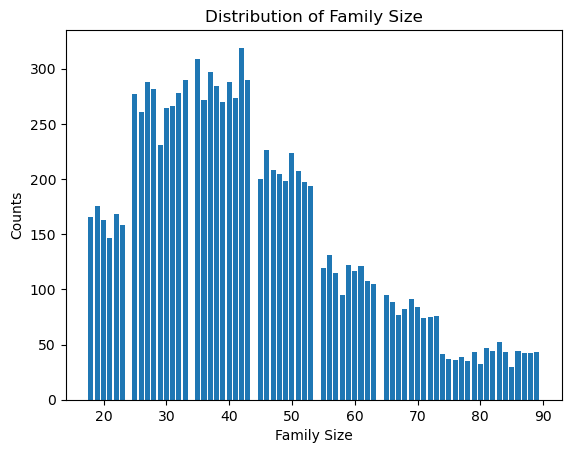

In [22]:
plt.bar(df['Age'].value_counts().index, df['Age'].value_counts().values)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Counts')

In [23]:
df['Spending_Score'].value_counts()

Spending_Score
Low        6279
Average    2497
High       1526
Name: count, dtype: int64

**The data now is good and ready to work with**

In [24]:
df.shape

(10302, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10302 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10302 non-null  object 
 1   Ever_Married     10302 non-null  object 
 2   Age              10302 non-null  int64  
 3   Graduated        10302 non-null  object 
 4   Profession       10302 non-null  object 
 5   Work_Experience  10302 non-null  float64
 6   Spending_Score   10302 non-null  object 
 7   Family_Size      10302 non-null  float64
 8   Var_1            10302 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 804.8+ KB


In [26]:
#copy the data
X = df.copy()

# Casting (data type conversion)

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
objects = ['Gender','Ever_Married','Graduated','Spending_Score','Var_1','Profession']
for i in objects:
    X[i] = encoder.fit_transform(X[i])

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10302 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10302 non-null  int32  
 1   Ever_Married     10302 non-null  int32  
 2   Age              10302 non-null  int64  
 3   Graduated        10302 non-null  int32  
 4   Profession       10302 non-null  int32  
 5   Work_Experience  10302 non-null  float64
 6   Spending_Score   10302 non-null  int32  
 7   Family_Size      10302 non-null  float64
 8   Var_1            10302 non-null  int32  
dtypes: float64(2), int32(6), int64(1)
memory usage: 563.4 KB


# Correlcation

In [29]:
X.corr()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Gender,1.000000,0.114769,0.018881,-0.040576,0.029316,-0.054540,-0.051495,0.067632,0.025638
Ever_Married,0.114769,1.000000,0.568890,0.197885,-0.125142,-0.094374,-0.627553,-0.061065,0.083830
Age,0.018881,0.568890,1.000000,0.236667,0.046789,-0.174146,-0.272794,-0.266094,0.172432
Graduated,-0.040576,0.197885,0.236667,1.000000,-0.297395,0.043659,-0.149606,-0.225193,0.131241
Profession,0.029316,-0.125142,0.046789,-0.297395,1.000000,-0.042674,0.220092,0.068712,-0.038775
Work_Experience,-0.054540,-0.094374,-0.174146,0.043659,-0.042674,1.000000,0.055967,-0.060502,0.026308
Spending_Score,-0.051495,-0.627553,-0.272794,-0.149606,0.220092,0.055967,1.000000,-0.127055,-0.031086
Family_Size,0.067632,-0.061065,-0.266094,-0.225193,0.068712,-0.060502,-0.127055,1.000000,-0.139593
Var_1,0.025638,0.083830,0.172432,0.131241,-0.038775,0.026308,-0.031086,-0.139593,1.000000


<Axes: >

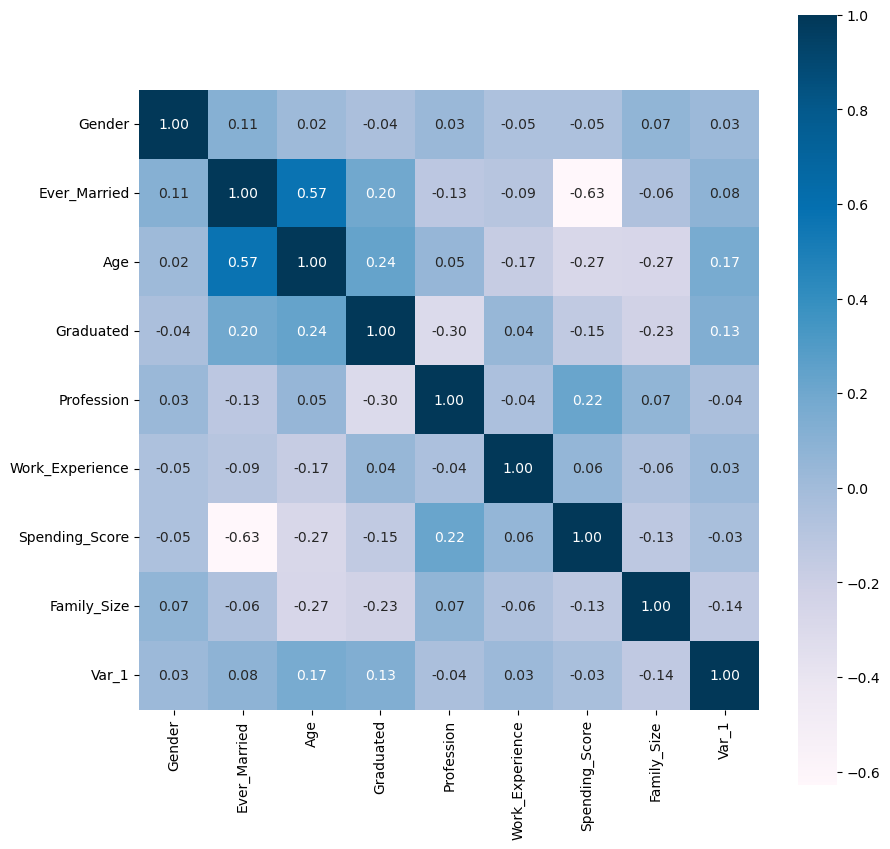

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), cmap="PuBu", square = True, annot=True, fmt='.2f')

**I notice that Spending_Score and Ever_Married features are badelly correlated and it's because there's no much categories in them**

**And noticed that is the most correlated features are Age and Ever_Married which was obvious in the plot that 50+ people are few comparing to 50- people**

# Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modeling (Clustering)

In [32]:
from sklearn.cluster import KMeans

**I will use Elbow Curve and Silhouette score to choose number of clusters**

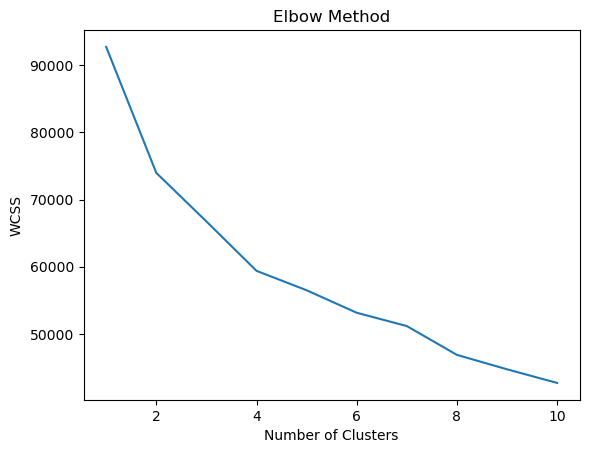

In [33]:
#Elbow curve
wcss = []
for i in range(1, 11):  # Testing from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
#Silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # Testing from 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()




For n_clusters=2, the silhouette score is 0.20309392669666
For n_clusters=3, the silhouette score is 0.17126273427131677
For n_clusters=4, the silhouette score is 0.18839203849248368
For n_clusters=5, the silhouette score is 0.17508549042353563
For n_clusters=6, the silhouette score is 0.16933397624123234
For n_clusters=7, the silhouette score is 0.16616058670016268
For n_clusters=8, the silhouette score is 0.1745914661328433
For n_clusters=9, the silhouette score is 0.17382682684182524


**Choosing 4 clusters is the best**

In [ ]:
k = 4 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
kmeans.fit(X)

In [ ]:
train_cluster_labels = kmeans.predict(X)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute silhouette score
silhouette = silhouette_score(X, train_cluster_labels)
print("Silhouette Score:", silhouette)

# Compute Davies–Bouldin index
davies_bouldin = davies_bouldin_score(X, train_cluster_labels)
print("Davies–Bouldin Index:", davies_bouldin)

# Access Within-Cluster Sum of Squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)


In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

In [ ]:
df['Cluster_ID'] = train_cluster_labels

In [ ]:
#naming the clusters
df['Cluster_ID'] = df['Cluster_ID'].replace([0,1,2,3], ['Cluster_1', 'Cluster_2','Cluster_3','Cluster_4',])

In [ ]:
df['Cluster_ID'].value_counts()

**Visualizing the clusters**

In [ ]:
sns.pairplot(df,hue='Cluster_ID',palette='coolwarm') 

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Family_Size', hue='Cluster_ID')

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x ='Cluster_ID', y ='Age', data=df)

In [ ]:
#Cluster Centers Heatmap
feature_names = df.drop('Cluster_ID', axis=1).columns

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centers, annot=True, cmap='viridis', fmt=".2f", xticklabels=feature_names)
plt.title('Cluster Centers Heatmap')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.xticks(rotation=45)  
plt.show()


In [ ]:
#Cluster Centers Plot
feature_names = df.drop('Cluster_ID', axis=1).columns

cluster_centers_df = pd.DataFrame(cluster_centers, columns=feature_names)

plt.figure(figsize=(12, 6))
cluster_centers_df.T.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Centers Plot')
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.xticks(rotation=45)  
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
#predictions
df